In [2]:
pip install pmdarima

     -------------------------------------- 572.0/572.0 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('TATAMOTORS.csv',index_col='DATE'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

ValueError: 'DATE' is not in list

In [5]:
pwd

'C:\\Users\\PRASH\\Documents\\Notebooks'

In [6]:
import pandas as pd
df=pd.read_csv('TATAMOTORS.csv',index_col='DATE'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()
df

ValueError: 'DATE' is not in list

In [7]:
import pandas as pd
df=pd.read_csv('TATAMOTORS.csv',index_col='Date'   ,parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (2456, 14)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,TATAMOTORS,EQ,1095.3,1096.0,1097.0,1075.60,1077.25,1079.9,1083.36,2412309,2.613407e+14,76698.0,1152083.0,0.4776
2011-06-02,TATAMOTORS,EQ,1079.9,1070.0,1070.0,1042.20,1046.15,1048.2,1050.62,2604237,2.736056e+14,74650.0,1149341.0,0.4413
2011-06-03,TATAMOTORS,EQ,1048.2,1048.0,1058.0,1014.25,1024.60,1023.8,1031.52,3600090,3.713581e+14,94611.0,1472425.0,0.4090
2011-06-06,TATAMOTORS,EQ,1023.8,1011.5,1031.8,1010.25,1022.20,1023.7,1020.38,2076683,2.119014e+14,64914.0,451682.0,0.2175
2011-06-07,TATAMOTORS,EQ,1023.7,1017.0,1033.8,1015.65,1028.00,1027.2,1027.38,2117760,2.175745e+14,56772.0,805423.0,0.3803


<AxesSubplot:xlabel='Date'>

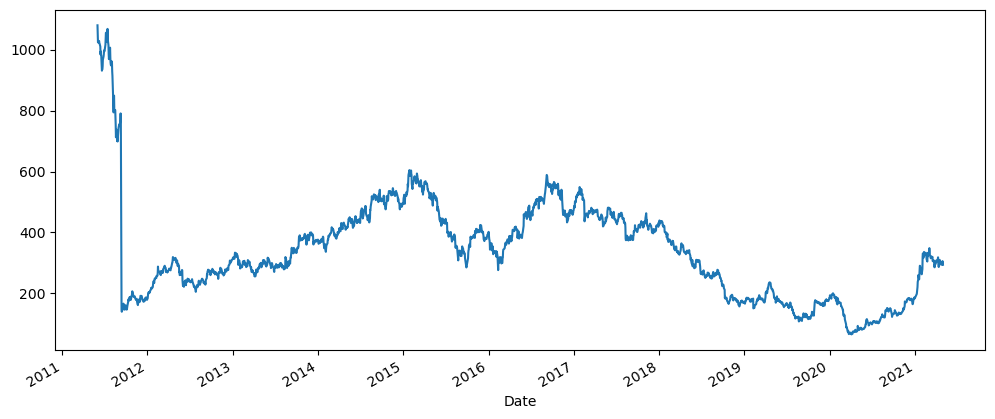

In [8]:
df['Close'].plot(figsize=(12,5))

In [13]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Close'])

1. ADF :  -4.855592403236513
2. P-Value :  4.2522405224656046e-05
3. Num Of Lags :  25
4. Num Of Observations Used For ADF Regression: 2430
5. Critical Values :
	 1% :  -3.4330439182185093
	 5% :  -2.862730143690387
	 10% :  -2.5674035621263696


In [15]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(df['Close'], trace=True,
suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=20290.397, Time=1.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20295.083, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20290.194, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=20289.574, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20294.189, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=20286.875, Time=2.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=20288.668, Time=3.69 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=20288.530, Time=3.75 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=20287.542, Time=1.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=20287.572, Time=1.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=20285.927, Time=0.75 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=20288.571, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=20289.194, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=20287.823, Time=0.77 sec
 ARIMA(1,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2456
Model:               SARIMAX(1, 1, 1)   Log Likelihood              -10139.963
Date:                Wed, 18 Jan 2023   AIC                          20285.927
Time:                        19:28:50   BIC                          20303.345
Sample:                             0   HQIC                         20292.256
                               - 2456                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7157      0.172     -4.158      0.000      -1.053      -0.378
ma.L1          0.7651      0.165      4.642      0.000       0.442       1.088
sigma2       226.5090      0.655    346.048      0.000     225.226     227.792
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):         132921009.31
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                           -27.94
Prob(H) (two-sided):                  0.00   Kurtosis:                      1141.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
from statsmodels.tsa.arima.model import ARIMA
print(df.shape)
train=df.iloc[:30]
test=df.iloc[:30]
print(train.shape,test.shape)
model=ARIMA(train['Close'],order=(1,0,5))
model=model.fit()
model.summary()

(2456, 14)
(30, 14) (30, 14)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   30
Model:                 ARIMA(1, 0, 5)   Log Likelihood                -124.902
Date:                Wed, 18 Jan 2023   AIC                            265.803
Time:                        20:10:51   BIC                            277.013
Sample:                    06-01-2011   HQIC                           269.389
                         - 07-12-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1004.7849     18.916     53.118      0.000     967.710    1041.860
ar.L1          0.2257      0.892      0.253      0.800      -1.522       1.973
ma.L1          0.9752      0.925      1.054      0.292      -0.838       2.788
ma.L2          1.2074      0.863      1.399      0.162      -0.485       2.899
ma.L3          0.9926      1.039      0.955      0.339      -1.044       3.029
ma.L4          0.6828      0.685      0.996      0.319      -0.661       2.026
ma.L5          0.3047      0.505      0.603      0.547      -0.686       1.295
sigma2       218.1302     87.631      2.489      0.013      46.376     389.884
===================================================================================
Ljung-Box (L1) (Q):                   0.83   Jarque-Bera (JB):                 5.65
Prob(Q):                              0.36   Prob(JB):                         0.06
Heteroskedasticity (H):               0.68   Skew:                            -0.70
Prob(H) (two-sided):                  0.55   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

2011-07-13    1009.365911
2011-07-14     993.945839
2011-07-15     989.895723
2011-07-18     994.361907
2011-07-19     998.996799
2011-07-20    1003.478541
2011-07-21    1004.490066
2011-07-22    1004.718366
2011-07-25    1004.769893
2011-07-26    1004.781522
2011-07-27    1004.784147
2011-07-28    1004.784739
2011-07-29    1004.784873
2011-08-01    1004.784903
2011-08-02    1004.784910
2011-08-03    1004.784912
2011-08-04    1004.784912
2011-08-05    1004.784912
2011-08-08    1004.784912
2011-08-09    1004.784912
2011-08-10    1004.784912
2011-08-11    1004.784912
2011-08-12    1004.784912
2011-08-15    1004.784912
2011-08-16    1004.784912
2011-08-17    1004.784912
2011-08-18    1004.784912
2011-08-19    1004.784912
2011-08-22    1004.784912
2011-08-23    1004.784912
Freq: B, Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Date'>

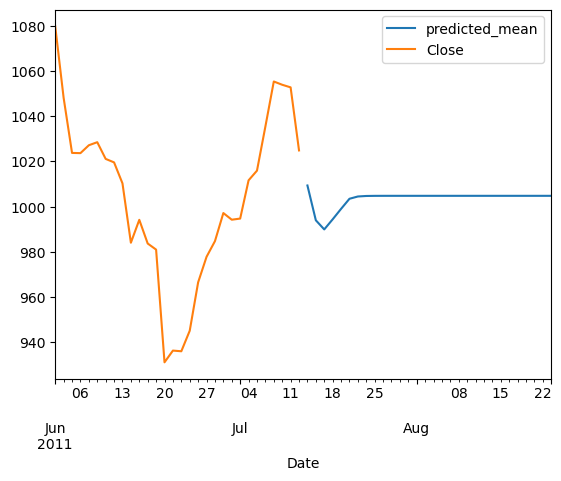

In [33]:
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Close'].mean()
rmse=sqrt(mean_squared_error(pred,test['Close']))
print(rmse)

38.124637832664305


In [35]:
test['Close'].mean()

1004.6166666666669

In [37]:
model2=ARIMA(df[ "Close" ],order=(1,0,5))
model2=model2.fit()
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-04-26,TATAMOTORS,EQ,294.0,297.0,299.0,294.60,295.85,295.40,296.48,30583139,9.067386e+14,173282.0,3291167.0,0.1076
2021-04-27,TATAMOTORS,EQ,295.4,295.7,302.5,295.10,302.10,301.50,299.05,35040532,1.047879e+15,191627.0,5215100.0,0.1488
2021-04-28,TATAMOTORS,EQ,301.5,303.5,309.5,303.00,305.15,305.90,307.22,44668126,1.372278e+15,264159.0,5116568.0,0.1145
2021-04-29,TATAMOTORS,EQ,305.9,308.9,310.0,301.25,302.20,301.90,304.77,36647292,1.116900e+15,186996.0,4193346.0,0.1144
2021-04-30,TATAMOTORS,EQ,301.9,298.2,301.3,292.55,293.10,293.85,297.01,36121668,1.072849e+15,227806.0,7898988.0,0.2187


In [38]:
index_future_dates=pd.date_range(start="2021-04-30',end='2021-05-30")
#print (index future dates)

pred=model2.predict(start=len(df),end=len(df)+30,typs"levels").rename("Stock Predictions"")
pred.index=index_future_dates
print(pred)

SyntaxError: positional argument follows keyword argument (375857693.py, line 4)

In [49]:
index_future_dates=pd.date_range(start="2021-04-30", end="2021-05-30")
pred=model2.predict(start=len(df),end=len(df)+30,typ="levels").rename("Stock Predictions")
pred.index=index_future_dates
print(pred)

2021-04-30    293.425074
2021-05-01    293.794394
2021-05-02    294.099516
2021-05-03    294.331086
2021-05-04    294.282883
2021-05-05    294.338774
2021-05-06    294.394593
2021-05-07    294.450342
2021-05-08    294.506019
2021-05-09    294.561624
2021-05-10    294.617159
2021-05-11    294.672623
2021-05-12    294.728016
2021-05-13    294.783338
2021-05-14    294.838590
2021-05-15    294.893771
2021-05-16    294.948882
2021-05-17    295.003922
2021-05-18    295.058892
2021-05-19    295.113792
2021-05-20    295.168621
2021-05-21    295.223381
2021-05-22    295.278070
2021-05-23    295.332690
2021-05-24    295.387240
2021-05-25    295.441721
2021-05-26    295.496131
2021-05-27    295.550473
2021-05-28    295.604745
2021-05-29    295.658947
2021-05-30    295.713081
Freq: D, Name: Stock Predictions, dtype: float64


<AxesSubplot:>

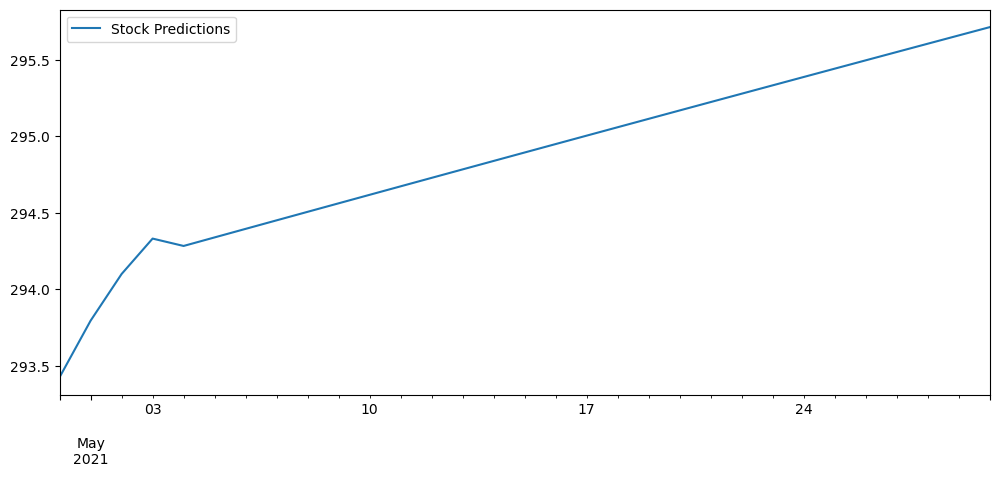

In [51]:
pred.plot(figsize=(12,5),legend=True)